In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
file_path1='/content/tourism_rating.csv'
df_trsm_rating= pd.read_csv(file_path1)
df_trsm_rating.shape


(10000, 3)

In [3]:
df_trsm_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [4]:
df_trsm_rating['Place_Ratings'].unique()

array([3, 2, 5, 4, 1])

In [5]:
df_trsm_rating['Place_Id'].value_counts()

,count
Place_Id,
298,39
177,39
437,38
201,37
208,36
...,...
72,13
161,13
124,13


In [6]:
df_trsm_rating.isna().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


**Exploratory analysis of user ratings data**

In [7]:
df_trsm_rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


<Axes: xlabel='Place_Ratings', ylabel='count'>

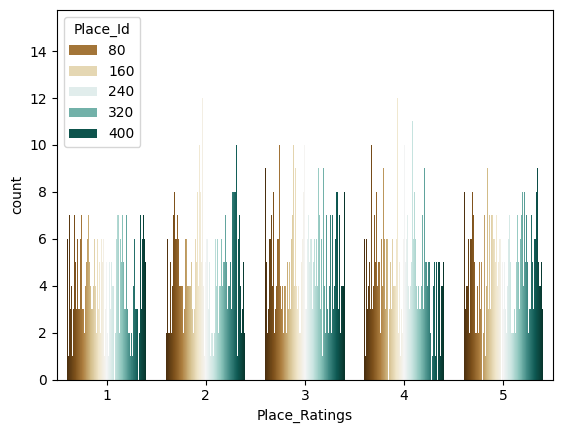

In [8]:
#Distribution of rating from 1 to 5 is spread across different places
sns.countplot(df_trsm_rating, x='Place_Ratings',hue='Place_Id',palette="BrBG")

In [9]:
# Top 3 places with highest rating_count
df_trsm_rating.groupby('Place_Id')['Place_Ratings'].count().reset_index(name='Rating_Count').nlargest(3, 'Rating_Count')

,Place_Id,Rating_Count
176,177,39
297,298,39
436,437,38


In [10]:
#user count of ratings for each place
rating_by_user=df_trsm_rating.groupby(['Place_Id','Place_Ratings'])['User_Id'].count().reset_index(name='User_Count')
rating_by_user.sort_values(by='User_Count',ascending=False)

,Place_Id,Place_Ratings,User_Count
2055,416,5,15
660,134,4,13
1483,300,4,13
872,177,3,12
990,201,2,12
...,...,...,...
1053,214,1,1
531,108,4,1
2128,431,3,1
2131,432,1,1


In [11]:
#Top 3 places with highest average ratings
df_trsm_rating.groupby('Place_Id')['Place_Ratings'].max().sort_values(ascending=False).head(3)

,Place_Ratings
Place_Id,
437,5
1,5
2,5


Tourism Ratings data is clean and requires no cleanup

In [12]:
file_path2='/content/tourism_with_id.xlsx'
df_trsm_id= pd.read_excel(file_path2)
df_trsm_id.shape


(437, 13)

In [13]:
df_trsm_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [14]:
df_trsm_id.isna().sum()/df_trsm_id.shape[0]*100

,0
Place_Id,0.000000
Place_Name,0.000000
Description,0.000000
Category,0.000000
City,0.000000
Price,0.000000
Rating,0.000000
Time_Minutes,53.089245
Coordinate,0.000000
Lat,0.000000


In [15]:
df_trsm_id["Unnamed: 12"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

* Unnamed:11 has all Nan values(100%) and can be dropped
* Time_Minutes has almost 47% null values and can be dropped after checking correlation matrix
* Unnamed:12 is a unique identifier like place_id and can be dropped for model processing
* Place_name,Description,Category and City should be encoded

In [16]:
df_trsm_id_new = df_trsm_id.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
df_trsm_id_new.shape

(437, 11)

In [17]:
df_trsm_id_new.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662


In [18]:
#Number of categories
df_trsm_id_new.groupby('Category')['Place_Id'].count()

,Place_Id
Category,
Bahari,47
Budaya,117
Cagar Alam,106
Pusat Perbelanjaan,15
Taman Hiburan,135
Tempat Ibadah,17


In [19]:
#Top 10 places visitors go to
top_locations = df_trsm_id_new['Place_Id'].value_counts().nlargest(10).index
top_loc_df = df_trsm_id_new[df_trsm_id_new['Place_Id'].isin(top_locations)]
top_loc_df

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
416,417,Klenteng Sanggar Agung,Kelenteng Sanggar Agung atau Klenteng Hong San...,Budaya,Surabaya,10000,4.5,NaN,"{'lat': -7.246944, 'lng': 112.802222}",-7.246944,112.802222
417,418,Museum Sepuluh Nopember Kota Surabaya,Museum Sepuluh November Surabaya adalah salah ...,Budaya,Surabaya,5000,4.7,NaN,"{'lat': -7.245436900000001, 'lng': 112.7378985}",-7.245437,112.737899
418,419,Monumen Tugu Pahlawan,Tugu Pahlawan (bahasa Indonesia: Tugu Pahlawan...,Budaya,Surabaya,0,4.7,30.0,"{'lat': -7.246925999999999, 'lng': 112.73781}",-7.246926,112.737810
419,420,Surabaya Museum (Gedung Siola),Saat ini Museum Surabaya Siola menjelma menjad...,Budaya,Surabaya,0,4.5,45.0,"{'lat': -7.256297200000001, 'lng': 112.7379955}",-7.256297,112.737995
420,421,Museum Kesehatan Dr. Adhyatma,"Museum Kesehatan Dr. Adhyatma, MPH adalah muse...",Budaya,Surabaya,10000,4.4,NaN,"{'lat': -7.240327999999999, 'lng': 112.731431}",-7.240328,112.731431
436,437,Gereja Perawan Maria Tak Berdosa Surabaya,Gereja Katolik Kelahiran Santa Perawan Maria m...,Tempat Ibadah,Surabaya,10000,4.8,NaN,"{'lat': -7.2420758, 'lng': 112.7368158}",-7.242076,112.736816


/tmp/ipython-input-3003106998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')


Text(0.5, 1.0, 'Top 10 Cities by Number of Tourist Spots')

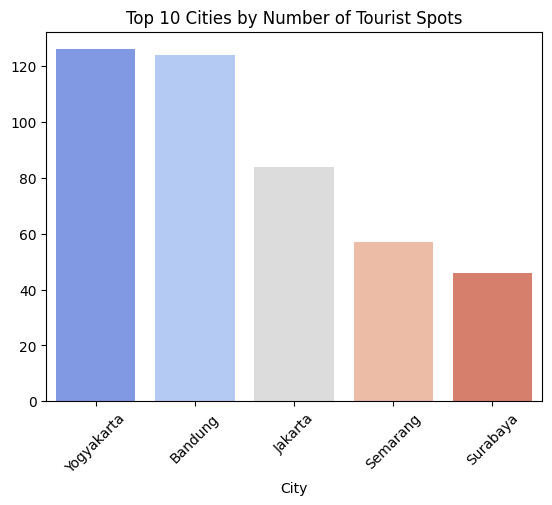

In [20]:
#Top 10 cities tourists go to
top_cities = df_trsm_id_new['City'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Cities by Number of Tourist Spots')

In [21]:
# Checking in Time_Minutes is null for a specific category
df_trsm_id_new[df_trsm_id_new['Time_Minutes'].isna()].groupby('Category')['Place_Id'].count()

,Place_Id
Category,
Bahari,39
Budaya,56
Cagar Alam,52
Pusat Perbelanjaan,5
Taman Hiburan,63
Tempat Ibadah,17


In [22]:
# Checking in Time_Minutes is null for a specific city
df_trsm_id_new[df_trsm_id_new['Time_Minutes'].isna()].groupby('City')['Place_Id'].count()

,Place_Id
City,
Bandung,74
Jakarta,47
Semarang,29
Surabaya,16
Yogyakarta,66


In [23]:
df_trsm_id_new.groupby('Category')['Time_Minutes'].mean()

,Time_Minutes
Category,
Bahari,80.625000
Budaya,73.524590
Cagar Alam,85.462963
Pusat Perbelanjaan,74.000000
Taman Hiburan,89.583333
Tempat Ibadah,NaN


In [24]:
df_trsm_id_new.groupby('City')['Time_Minutes'].mean()

,Time_Minutes
City,
Bandung,101.400000
Jakarta,98.513514
Semarang,70.357143
Surabaya,51.500000
Yogyakarta,78.416667


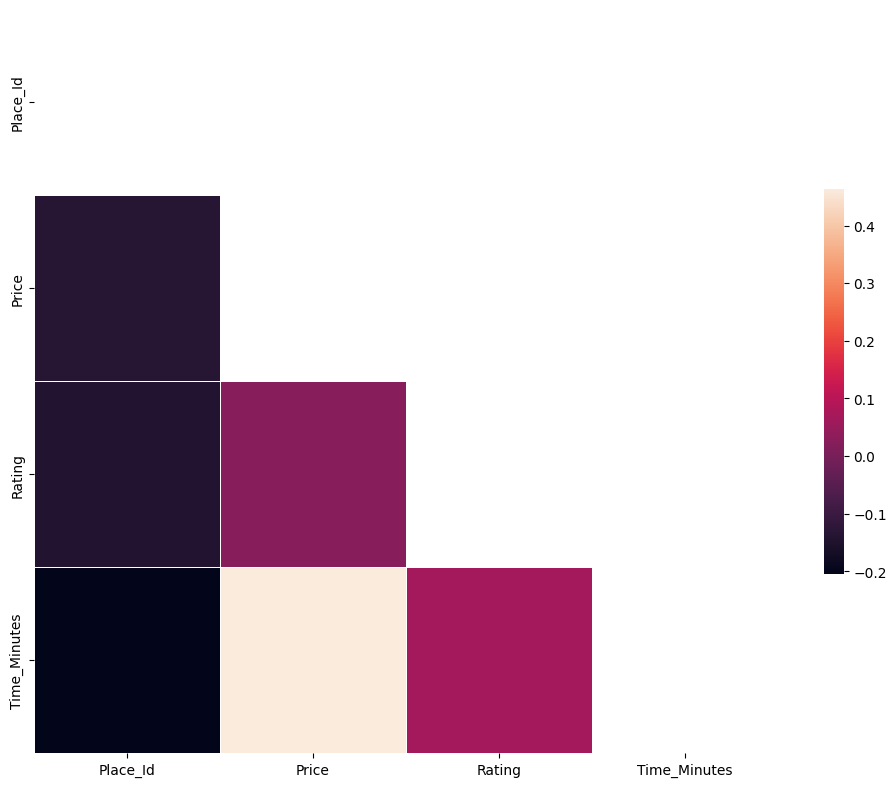

In [25]:
col_list=['Place_Id','Price','Rating','Time_Minutes']
corr_matrix = df_trsm_id_new[col_list].corr()
corr_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix,mask=corr_mask,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.grid(False)

In [26]:
print(corr_matrix)

              Place_Id     Price    Rating  Time_Minutes
Place_Id      1.000000 -0.133997 -0.142794     -0.204259
Price        -0.133997  1.000000  0.023243      0.464028
Rating       -0.142794  0.023243  1.000000      0.068184
Time_Minutes -0.204259  0.464028  0.068184      1.000000


| Relationship          | Correlation    | Strength   | Interpretation                                |
| --------------------- | -------------- | ---------- | --------------------------------------------- |
| Price ↔ Time_Minutes  | 0.46           | Moderate + | Longer tours tend to be more expensive        |
| Price ↔ Rating        | 0.02           | Very Weak  | Price doesn’t influence ratings               |
| Rating ↔ Time_Minutes | 0.07           | Very Weak  | Tour length has little effect on satisfaction |
| Place_Id ↔ others     | -0.13 to -0.20 | None       | Ignore (not meaningful)                       |


/tmp/ipython-input-3903112690.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_trsm_id_new, x='Category', y='Time_Minutes', palette='Set2')


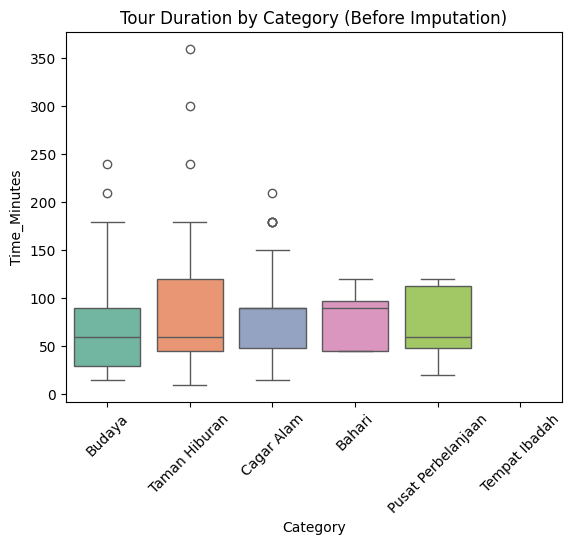

In [27]:
sns.boxplot(data=df_trsm_id_new, x='Category', y='Time_Minutes', palette='Set2')
plt.title('Tour Duration by Category (Before Imputation)')
plt.xticks(rotation=45)
plt.show()

In [28]:
#Imputation Time_Minutes with category median
df_trsm_id_new['Time_Minutes']=df_trsm_id_new['Time_Minutes'].fillna(df_trsm_id_new.groupby('Category')['Time_Minutes'].transform('mean'))
#Further Imputation Time_Minutes with city median
df_trsm_id_new['Time_Minutes']=df_trsm_id_new['Time_Minutes'].fillna(df_trsm_id_new.groupby('City')['Time_Minutes'].transform('mean'))



In [29]:
#check values
df_trsm_id_new['Time_Minutes'].isna().sum()

np.int64(0)

/tmp/ipython-input-4176901326.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_trsm_id_new, x='Category', y='Time_Minutes', palette='Set2')


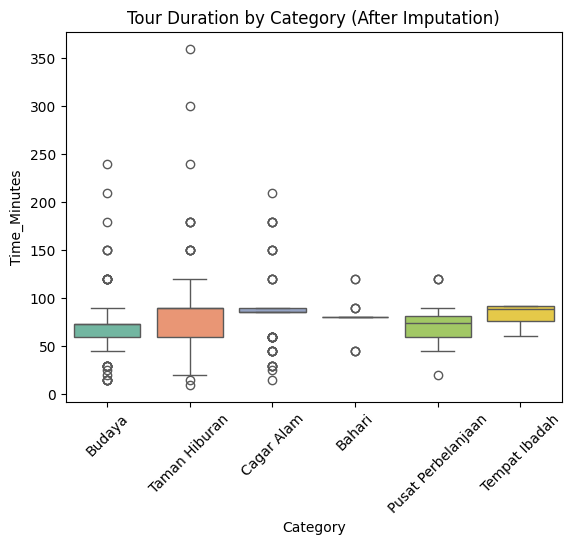

In [30]:
sns.boxplot(data=df_trsm_id_new, x='Category', y='Time_Minutes', palette='Set2')
plt.title('Tour Duration by Category (After Imputation)')
plt.xticks(rotation=45)
plt.show()

Imputation of Time_minutes is not required for recommender system however did it for future hybrid recommender requirement if needed.

In [31]:
df_trsm_id_new.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.000000,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.000000,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.000000,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,89.583333,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.000000,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


**Exploratory Analysis of Tourism Data**

In [32]:
file_path3='/content/user.csv'
df_user= pd.read_csv(file_path3)
df_user.shape

(300, 3)

In [33]:
df_user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [34]:
df_user.isna().sum()

,0
User_Id,0
Location,0
Age,0


In [35]:
df_user.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


Maximum visitors are in age group of 29-31

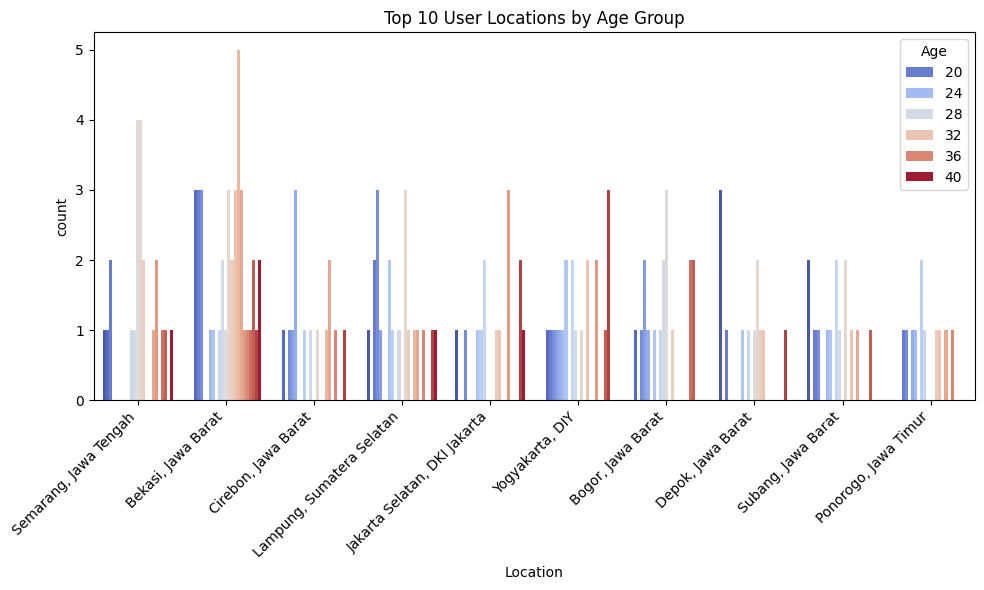

In [36]:
# Top 10 locations by count
top_locations = df_user['Location'].value_counts().nlargest(10).index
filtered_df = df_user[df_user['Location'].isin(top_locations)]

plt.figure(figsize=(10,6))
sns.countplot(
    data=filtered_df,
    x='Location', hue='Age',
    palette='coolwarm'
)

plt.xticks(rotation=45, ha='right')
plt.title("Top 10 User Locations by Age Group")
plt.tight_layout()
plt.show()

 ***Project Requirement 2.I. Analyzing the age distribution of users visiting the places and rating them***

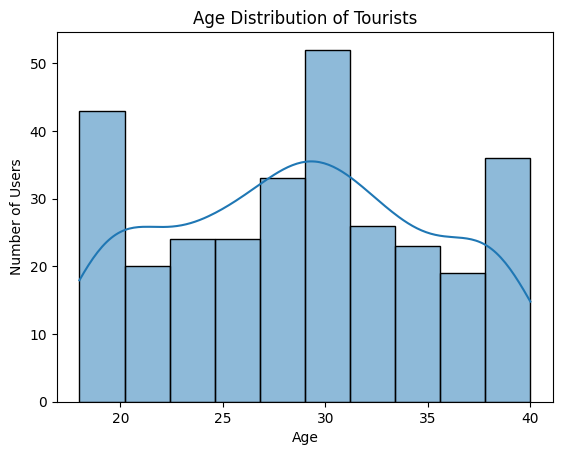

In [37]:
sns.histplot(df_user['Age'],kde=True,bins=10)
plt.title("Age Distribution of Tourists")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

***Project Requirement 2.II. Identifying the places where most of these users (tourists) are coming from***

In [38]:
#Top 10 location visitors go to
df_user['Location'].value_counts().nlargest(10).index


Index(['Bekasi, Jawa Barat', 'Semarang, Jawa Tengah',
       'Lampung, Sumatera Selatan', 'Yogyakarta, DIY', 'Bogor, Jawa Barat',
       'Cirebon, Jawa Barat', 'Jakarta Selatan, DKI Jakarta',
       'Subang, Jawa Barat', 'Depok, Jawa Barat', 'Ponorogo, Jawa Timur'],
      dtype='object', name='Location')

***Project Requirement 3.I. What are the different categories of tourist spots?***

/tmp/ipython-input-2073057321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_trsm_id_new, x='Category', palette="BrBG")


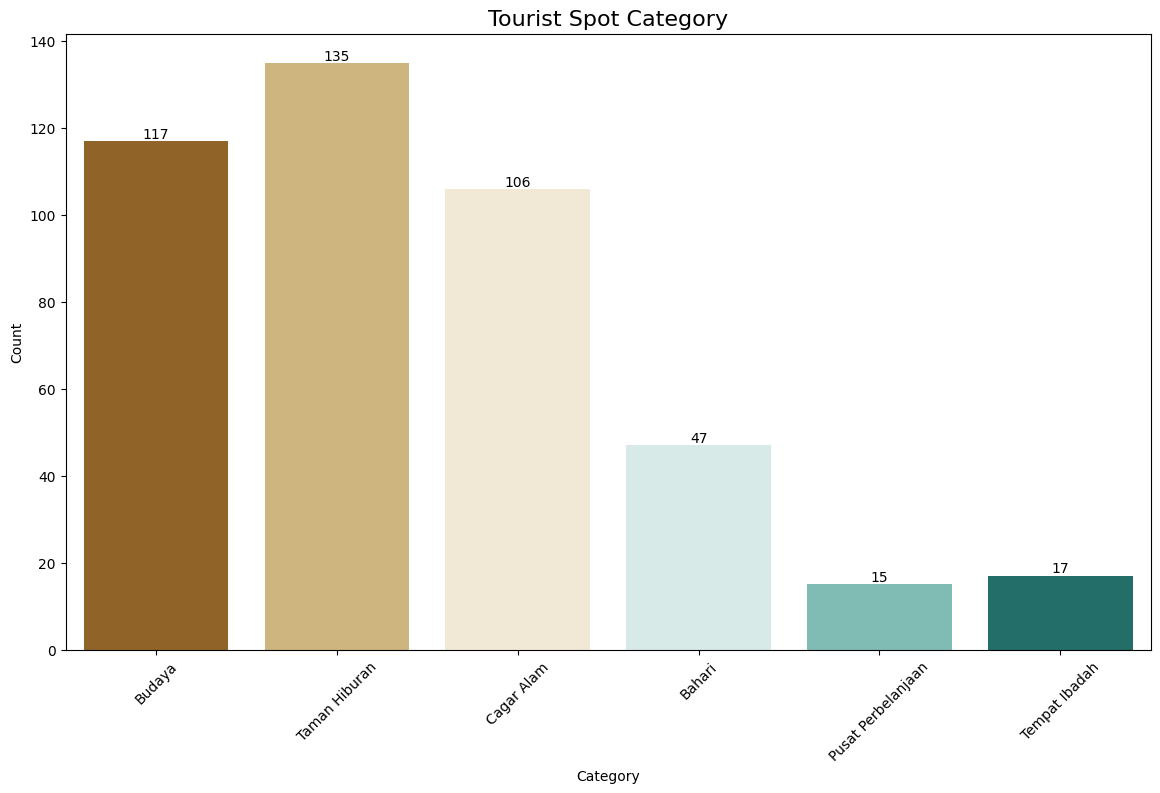

In [39]:
plt.figure(figsize=(14,8))
ax = sns.countplot(data=df_trsm_id_new, x='Category', palette="BrBG")

# Number of places per category
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xticks(rotation=45)
plt.title("Tourist Spot Category", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Count")

plt.show()

***Project Requirement 3.II. What kind of tourism each location is most famous or suitable for?***

In [40]:
top_category_per_city = df_trsm_id_new.groupby('City')['Category'].agg(lambda x:x.mode()[0])
print(top_category_per_city)

City
Bandung          Cagar Alam
Jakarta              Budaya
Semarang         Cagar Alam
Surabaya             Budaya
Yogyakarta    Taman Hiburan
Name: Category, dtype: object


***Project Requirement 3.III. Which city would be the best for a nature enthusiast to visit?***

In [41]:
nature_spots = df_trsm_id_new[df_trsm_id_new['Category'].str.contains("Cagar Alam|Nature", case=False)]
nature_counts = nature_spots['City'].value_counts()
print(nature_counts)

City
Bandung       54
Yogyakarta    23
Semarang      20
Surabaya       5
Jakarta        4
Name: count, dtype: int64


***Bandung is the best city for nature tourism***

***Create combined dataframe with places and ratings for better analysis***

In [42]:
df_combined = pd.merge(df_trsm_rating, df_trsm_id_new, on='Place_Id', how='left')
df_combined.shape

(10000, 13)

In [43]:
df_combined.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,90.00000,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
1,1,344,2,Pantai Marina,Pantai Marina (bahasa Jawa: Í¶•Í¶±Í¶∂Í¶±Í¶∂Í¶Ç...,Bahari,Semarang,3000,4.1,80.62500,"{'lat': -6.948877, 'lng': 110.3893285}",-6.948877,110.389329
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.00000,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.00000,"{'lat': -7.264598899999997, 'lng': 110.4046017}",-7.264599,110.404602
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0,73.52459,"{'lat': -7.792189999999999, 'lng': 110.362151}",-7.792190,110.362151


 ***Project Requirement 4.I Figure out the spots that are most loved by the tourists.***


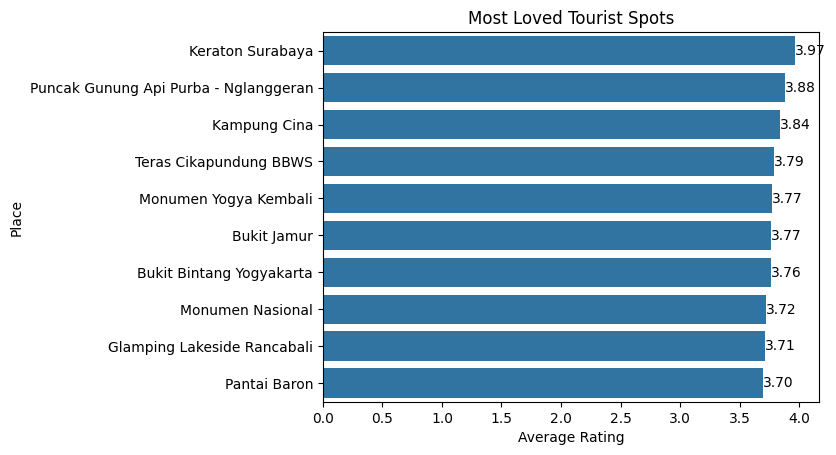

In [44]:
top_places = df_combined.groupby('Place_Name')['Place_Ratings'].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x=top_places.values, y=top_places.index)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title("Most Loved Tourist Spots")
plt.xlabel("Average Rating")
plt.ylabel("Place")
plt.show()

***Project Requirement 4.I b which city has the most loved tourist spots?***

In [45]:
top_cities = df_combined.groupby('City')['Place_Ratings'].mean().sort_values(ascending=False)
print(top_cities.head())

City
Yogyakarta    3.104493
Bandung       3.078466
Surabaya      3.072381
Semarang      3.034169
Jakarta       3.010937
Name: Place_Ratings, dtype: float64


 ***Project Requirement 4.II. which category of places are users
liking the most?***

In [46]:
top_categories = df_combined.groupby('Category')['Place_Ratings'].mean().sort_values(ascending=False)
print(top_categories.head())

Category
Taman Hiburan    3.117917
Cagar Alam       3.080745
Tempat Ibadah    3.080519
Budaya           3.034663
Bahari           3.006487
Name: Place_Ratings, dtype: float64


***Project Requirement 5: Build a Recommender System
Develop a collaborative filtering model for recommendation and
use that to recommend other places to visit using the current tourist location (place
name)***

In [47]:
train_df, test_df = train_test_split(df_trsm_rating, test_size=0.2, random_state=42)

In [48]:
# Create user-item rating matrix from df_trsm_rating
ratings_matrix = train_df.pivot_table(
    index='User_Id',
    columns='Place_Id',
    values='Place_Ratings'
)
# Compute mean rating for each place
place_mean = ratings_matrix.mean(axis=0)

# Subtract mean from each rating (center the data)
place_user_matrix_centered = ratings_matrix.sub(place_mean, axis=0).fillna(0)

In [49]:
# Transpose for item-based similarity (places x users)
item_similarity = cosine_similarity(place_user_matrix_centered.T)

# Convert to DataFrame for easy lookup
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=ratings_matrix.columns,
    columns=ratings_matrix.columns
)
item_similarity_df.head()

Place_Id,1,2,3,4,5,6,7,8,9,10,...,428,429,430,431,432,433,434,435,436,437
Place_Id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.000000,-0.003260,-0.027171,0.031948,0.000000,0.000000,-0.024016,0.014793,-0.003637,...,0.060707,0.071189,0.013840,-0.031489,0.000000,0.000000,-0.100057,0.000000,0.099754,0.050030
2,0.000000,1.000000,0.007316,0.000000,0.000000,0.001252,-0.028435,0.000000,0.000000,-0.085155,...,-0.122631,-0.015862,-0.015863,0.000000,-0.023048,0.000000,0.012198,0.000000,0.000000,0.059103
3,-0.003260,0.007316,1.000000,-0.045740,0.000000,0.079194,0.000000,-0.028189,-0.025677,0.000000,...,0.023041,0.000000,-0.096180,0.000000,-0.079366,0.000000,-0.023905,0.078315,0.000000,0.000000
4,-0.027171,0.000000,-0.045740,1.000000,0.061477,0.000000,0.000000,-0.032581,-0.014652,-0.084547,...,0.000286,0.028750,0.000000,0.000000,0.000000,0.046542,-0.129732,0.130571,-0.012463,0.060825
5,0.031948,0.000000,0.000000,0.061477,1.000000,0.000000,0.000000,-0.017310,-0.029305,0.000000,...,0.030791,0.099521,-0.005141,-0.051065,0.064457,0.000000,0.000000,0.000000,-0.053167,0.000000


***Function to recommend***

In [50]:
def recommend_places(current_place_name, df_places, similarity_df, top_n=5):
    """
    Recommends places similar to the given place name.

    Parameters:
    - current_place_name: str, the name of the place to find similar spots for
    - df_places: DataFrame df_trsm_id_new with place details
    - similarity_df: DataFrame, item-item similarity matrix
    - top_n: int, number of recommendations

    Returns:
    - DataFrame of recommended places with details
    """
    # Get Place_Id for the given place name
    place_id = df_places.loc[df_places['Place_Name'] == current_place_name, 'Place_Id'].values[0]

    # Get similarity scores for this place with all others
    similar_scores = similarity_df[place_id].sort_values(ascending=False)

    # Drop the place itself
    similar_scores = similar_scores.drop(place_id)

    # Get top N similar Place_Ids
    top_place_ids = similar_scores.head(top_n).index

    # Return the place details
    recommended_places = df_places[df_places['Place_Id'].isin(top_place_ids)][
        ['Place_Name', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes']
    ]

    return recommended_places


In [51]:
# How to run the location based recommendations
recommend_places("Monumen Nasional", df_trsm_id_new, item_similarity_df, top_n=5)

,Place_Name,Category,City,Price,Rating,Time_Minutes
73,Museum Tengah Kebun,Budaya,Jakarta,0,4.6,120.000000
188,Pantai Nguluran,Bahari,Yogyakarta,10000,4.1,80.625000
229,Stone Garden Citatah,Taman Hiburan,Bandung,30000,4.4,89.583333
317,Situ Patenggang,Cagar Alam,Bandung,20000,4.5,85.462963
393,Air Mancur Menari,Taman Hiburan,Surabaya,35000,4.4,45.000000


***Tourist visiting Monumen Nasional can go to either of the above places depending on the time to tour, price and category based on their liking.***

In [52]:
# Create user-place matrix (rows = users, columns = places)
user_place_matrix = train_df.pivot_table(index='User_Id', columns='Place_Id', values='Place_Ratings')
# Subtract user mean, ignoring NaNs
user_mean = user_place_matrix.mean(axis=1)
user_place_matrix_centered = user_place_matrix.sub(user_mean, axis=0)

# Fill remaining NaNs with 0 (interpreted as "no rating")
user_place_matrix_centered = user_place_matrix_centered.fillna(0)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_place_matrix_centered)

# Convert to DataFrame for easy lookup
user_similarity_df = pd.DataFrame(user_similarity,
                                  index=user_place_matrix.index,
                                  columns=user_place_matrix.index)

***Function for user based recommendation***

In [53]:
def recommend_for_user(current_user_id, df_ratings, df_places, user_similarity_df, top_n=5):
    """
    Recommend places for a given user based on similar users' preferences.

    Parameters:
    - current_user_id: int or str, the ID of the user
    - df_ratings: DataFrame with columns ['User_Id', 'Place_Id', 'Rating']
    - df_places: DataFrame with place details
    - user_similarity_df: DataFrame, user-user similarity matrix
    - top_n: int, number of recommendations

    Returns:
    - DataFrame of recommended places
    """

    #  Get similar users for the current user
    similar_users = user_similarity_df[current_user_id].sort_values(ascending=False)

    # Drop the current user
    similar_users = similar_users.drop(current_user_id)

    # Select top similar users (e.g., top 10)
    top_similar_users = similar_users.head(10).index

    # Get all places rated by these similar users
    similar_users_ratings = df_ratings[df_ratings['User_Id'].isin(top_similar_users)]

    # Get places the current user has already rated
    user_rated_places = df_ratings[df_ratings['User_Id'] == current_user_id]['Place_Id']

    # Filter out already-rated places
    recommendations = similar_users_ratings[~similar_users_ratings['Place_Id'].isin(user_rated_places)]

    # Aggregate by place (average rating weighted by similarity)
    # Merge similarity scores
    recommendations = recommendations.merge(
        user_similarity_df[[current_user_id]].reset_index().rename(
            columns={'index': 'User_Id', current_user_id: 'Similarity'}
        ),
        on='User_Id',
        how='left'
    )

    # Weighted score = rating * similarity
    recommendations['Weighted_Rating'] = recommendations['Place_Ratings'] * recommendations['Similarity']

    # Aggregate scores for each place
    place_scores = (recommendations.groupby('Place_Id')['Weighted_Rating']
                    .sum() / recommendations.groupby('Place_Id')['Similarity'].sum())

    # Get top N place IDs
    top_place_ids = place_scores.sort_values(ascending=False).head(top_n).index

    # Return details
    recommended_places = df_places[df_places['Place_Id'].isin(top_place_ids)][
        ['Place_Name', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes']
    ]

    return recommended_places

***Test User based rating***

In [54]:
user_recs = recommend_for_user(
    current_user_id=101,
    df_ratings=train_df,
    df_places=df_trsm_id_new,
    user_similarity_df=user_similarity_df,
    top_n=5
)

print(user_recs)

                 Place_Name            Category     City   Price  Rating  \
0          Monumen Nasional              Budaya  Jakarta   20000     4.6   
1                  Kota Tua              Budaya  Jakarta       0     4.6   
7             Ocean Ecopark       Taman Hiburan  Jakarta  180000     4.0   
34     Grand Indonesia Mall  Pusat Perbelanjaan  Jakarta       0     4.7   
36  Bumi Perkemahan Cibubur       Taman Hiburan  Jakarta   10000     4.5   

    Time_Minutes  
0      15.000000  
1      90.000000  
7      89.583333  
34    120.000000  
36     89.583333  


***Evaluate the functions***

In [55]:
def eval_tour_recommnd_model(train_df, test_df,
                             similarity_df=None,
                             user_place_matrix=None,
                             user_similarity_df=None,
                             top_k=10,
                             mode='item'):
    """
    Evaluate Item-Based or User-Based recommendation system using Precision@k and Recall@k.

    Parameters:
    - train_df: training ratings DataFrame
    - test_df: test ratings DataFrame
    - similarity_df: item-item similarity DataFrame (for item-based)
    - user_place_matrix: centered user-item matrix (for user-based)
    - user_similarity_df: user-user similarity DataFrame (for user-based)
    - top_k: number of top recommendations
    - mode: 'item' or 'user'

    Returns:
    - avg_precision, avg_recall
    """
    precisions, recalls = [], []

    # Group test ratings by user
    test_grouped = test_df.groupby('User_Id')

    for uid, group in test_grouped:
        actual = set(group['Place_Id'].values)
        if len(actual) == 0:
            continue

        recommended = []

        if mode == 'item':
            # Item-based CF
            for pid in actual:
                if pid not in similarity_df.index:
                    continue
                sim_scores = similarity_df[pid].sort_values(ascending=False).drop(pid)
                recommended.extend(sim_scores.head(top_k).index)
            recommended = list(dict.fromkeys(recommended))[:top_k]  # unique top-k

        elif mode == 'user':
            # User-based CF
            if uid not in user_similarity_df.index:
                continue  # cold-start
            sim_users = user_similarity_df[uid].sort_values(ascending=False).drop(uid)
            top_users = sim_users.head(10).index

            weighted_ratings = user_place_matrix.loc[top_users].T.dot(sim_users[top_users])
            predicted_ratings = weighted_ratings / (sim_users[top_users].sum() + 1e-8)

            # Remove already rated places
            rated_places = user_place_matrix.loc[uid][user_place_matrix.loc[uid] > 0].index
            predicted_ratings = predicted_ratings.drop(rated_places, errors='ignore')

            recommended = predicted_ratings.sort_values(ascending=False).head(top_k).index

        # Compute hits
        hit_count = len(set(recommended) & actual)
        precisions.append(hit_count / top_k)
        recalls.append(hit_count / len(actual))

    avg_precision = sum(precisions) / len(precisions) if precisions else 0
    avg_recall = sum(recalls) / len(recalls) if recalls else 0

    return avg_precision, avg_recall


***Test Place based recommendation function precision and recall***

In [56]:
precision_item, recall_item = eval_tour_recommnd_model(
    train_df=train_df,
    test_df=test_df,
    similarity_df=item_similarity_df,
    top_k=10,
    mode='item'
)

print(f"Item-Based → Precision@10: {precision_item:.3f}, Recall@10: {recall_item:.3f}")

Item-Based → Precision@10: 0.010, Recall@10: 0.013


***Test User based recommendation function precision and recall***

In [57]:
precision_user, recall_user = eval_tour_recommnd_model(
    train_df=train_df,
    test_df=test_df,
    user_place_matrix=user_place_matrix,
    user_similarity_df=user_similarity_df,
    top_k=10,
    mode='user'
)

print(f"User-Based → Precision@10: {precision_user:.3f}, Recall@10: {recall_user:.3f}")


User-Based → Precision@10: 0.015, Recall@10: 0.021
